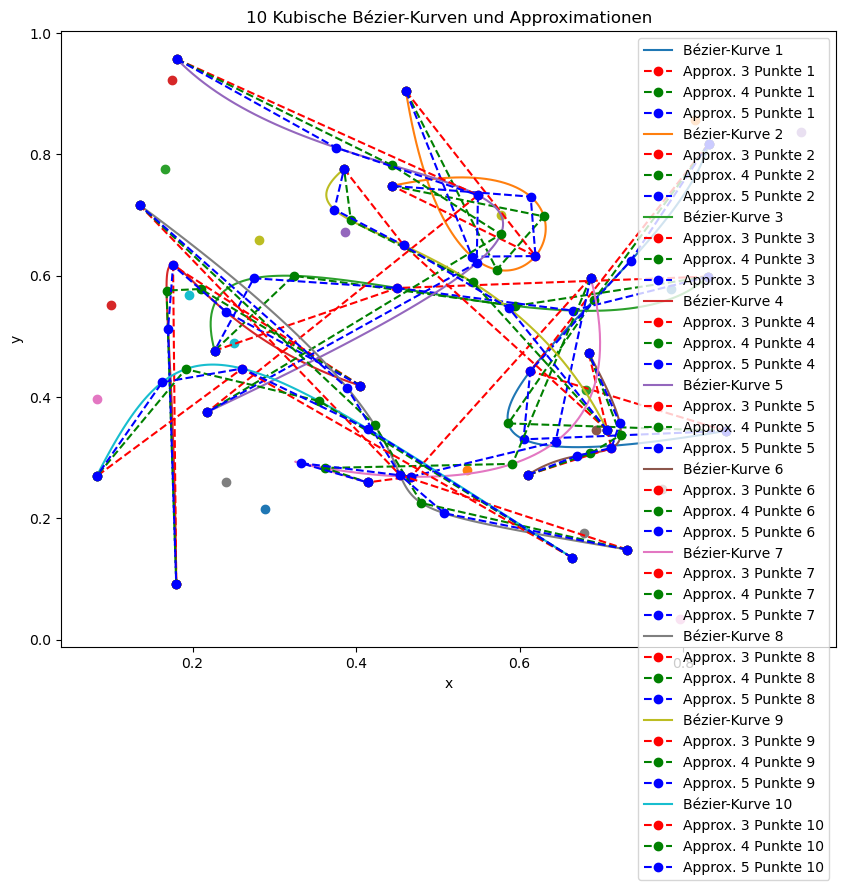

             Länge der Kurve Summe der Abstände (3 Punkte)  \
0                   0.813021                      0.692355   
1                   0.665809                      0.524706   
2                   0.722521                       0.62692   
3                   0.836378                      0.828718   
4                   0.981602                      0.918804   
...                      ...                           ...   
996                 0.716751                      0.670048   
997                 0.828518                      0.821759   
998                 0.730434                      0.585847   
999                 0.814024                      0.806692   
Durchschnitt                                                 

             Summe der Abstände (4 Punkte) Summe der Abstände (5 Punkte)  \
0                                 0.788566                       0.79531   
1                                 0.611815                      0.630599   
2                          

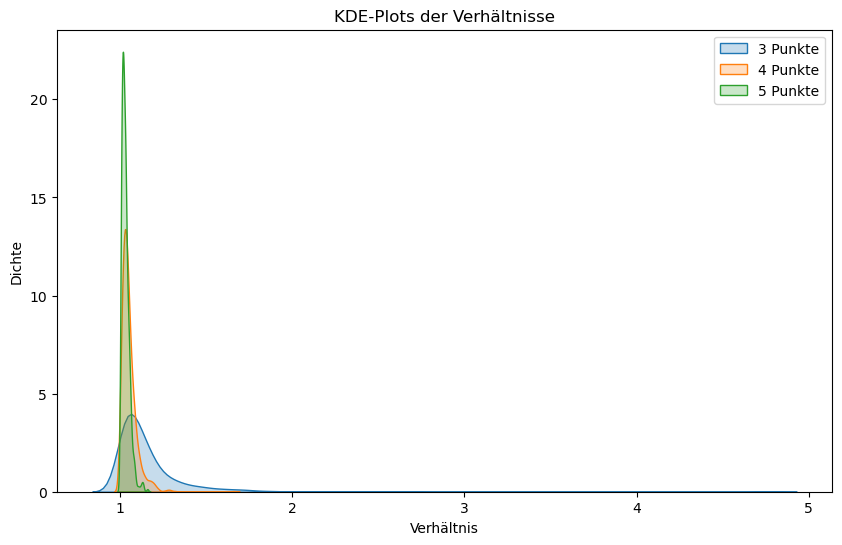

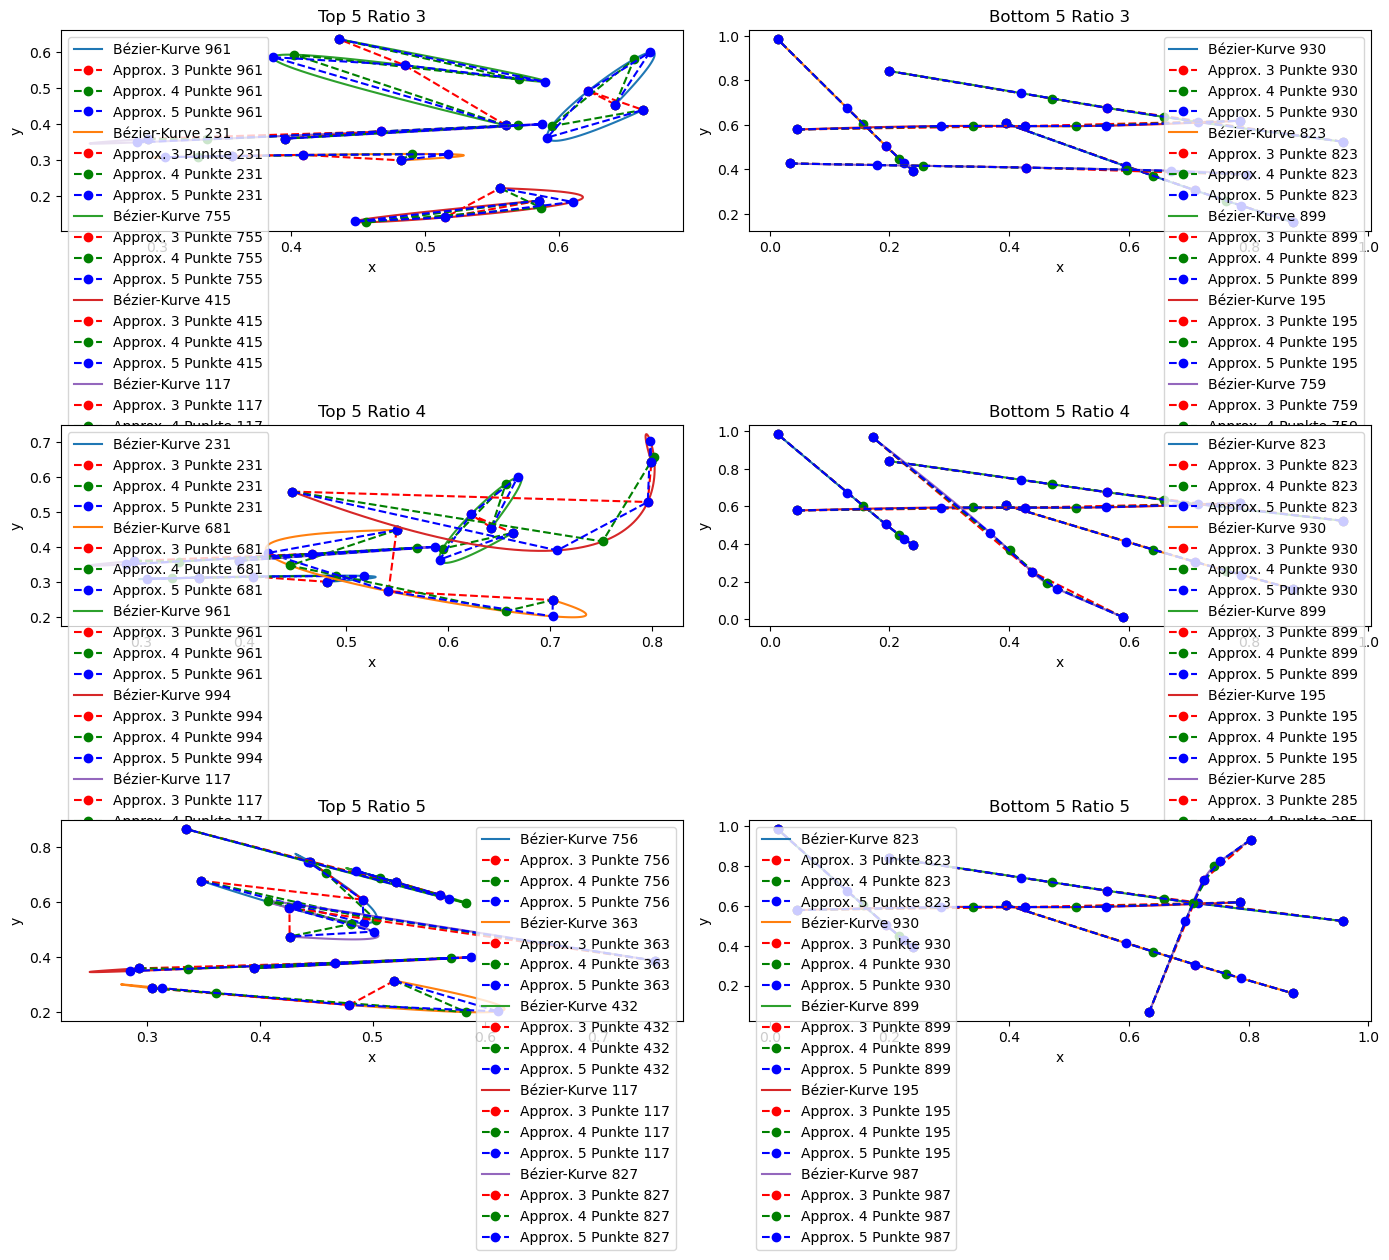

Top 5 Ratio 3 Punkte:
    Länge der Kurve Summe der Abstände (3 Punkte)  \
960        0.522857                      0.109657   
230        0.341223                      0.127558   
754        0.677634                       0.27121   
414        0.412245                      0.175672   
116         0.58516                      0.249468   

    Summe der Abstände (4 Punkte) Summe der Abstände (5 Punkte)  \
960                      0.404041                      0.500913   
230                      0.205635                      0.302841   
754                      0.609407                       0.66703   
414                      0.341679                      0.389611   
116                      0.458732                      0.516345   

     Länge der Kurve/Summe der Abstände (3)  \
960                                4.768102   
230                                2.675035   
754                                2.498556   
414                                2.346678   
116                  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Kubische Bézier-Kurve
def cubic_bezier(points, t):
    return (1-t)**3 * points[0] + 3*(1-t)**2 * t * points[1] + 3*(1-t)*t**2 * points[2] + t**3 * points[3]

# Funktion zur Berechnung der Länge der Bézier-Kurve
def curve_length(curve):
    distances = np.sqrt(np.sum(np.diff(curve, axis=0)**2, axis=1))
    return np.sum(distances)

# Anzahl der Punktegruppen
n = 1000  # Beispielwert, können Sie anpassen

# Zufällige Punkte generieren
punkte_cubic = np.random.rand(n, 4, 2)  # Kubische Bézier-Kurve: 4 Punkte, 2-dimensionaler Raum

# Ergebnisse speichern
data = []

# Plot
plt.figure(figsize=(10, 8))
t = np.linspace(0, 1, 100)
t_approx_3 = np.linspace(0, 1, 3)  # Drei Punkte zur Approximation
t_approx_4 = np.linspace(0, 1, 4)  # Vier Punkte zur Approximation
t_approx_5 = np.linspace(0, 1, 5)  # Fünf Punkte zur Approximation

for i in range(n):
    # Kubische Bézier-Kurve
    curve_cubic = np.array([cubic_bezier(punkte_cubic[i], t_val) for t_val in t])
    length_cubic = curve_length(curve_cubic)
    
    approx_points_3 = np.array([cubic_bezier(punkte_cubic[i], t_val) for t_val in t_approx_3])
    approx_points_4 = np.array([cubic_bezier(punkte_cubic[i], t_val) for t_val in t_approx_4])
    approx_points_5 = np.array([cubic_bezier(punkte_cubic[i], t_val) for t_val in t_approx_5])
    
    approx_dist_3 = curve_length(approx_points_3)
    approx_dist_4 = curve_length(approx_points_4)
    approx_dist_5 = curve_length(approx_points_5)
    
    ratio_3 = length_cubic / approx_dist_3
    ratio_4 = length_cubic / approx_dist_4
    ratio_5 = length_cubic / approx_dist_5
    
    data.append([length_cubic, approx_dist_3, approx_dist_4, approx_dist_5, ratio_3, ratio_4, ratio_5])
    
    # Plotting
    if i < 10:  # Plot only the first 10 curves for clarity
        plt.scatter(punkte_cubic[i, :, 0], punkte_cubic[i, :, 1])
        plt.plot(curve_cubic[:, 0], curve_cubic[:, 1], label=f'Bézier-Kurve {i+1}')
        plt.plot(approx_points_3[:, 0], approx_points_3[:, 1], 'ro--', label=f'Approx. 3 Punkte {i+1}')
        plt.plot(approx_points_4[:, 0], approx_points_4[:, 1], 'go--', label=f'Approx. 4 Punkte {i+1}')
        plt.plot(approx_points_5[:, 0], approx_points_5[:, 1], 'bo--', label=f'Approx. 5 Punkte {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'{min(n,10)} Kubische Bézier-Kurven und Approximationen')
plt.show()

# Tabelle erstellen
df = pd.DataFrame(data, columns=['Länge der Kurve', 'Summe der Abstände (3 Punkte)', 'Summe der Abstände (4 Punkte)', 'Summe der Abstände (5 Punkte)', 'Länge der Kurve/Summe der Abstände (3)', 'Länge der Kurve/Summe der Abstände (4)', 'Länge der Kurve/Summe der Abstände (5)'])

# Durchschnittswerte berechnen
mean_ratio_3 = df['Länge der Kurve/Summe der Abstände (3)'].mean()
mean_ratio_4 = df['Länge der Kurve/Summe der Abstände (4)'].mean()
mean_ratio_5 = df['Länge der Kurve/Summe der Abstände (5)'].mean()

# Durchschnittswerte zur Tabelle hinzufügen
df.loc['Durchschnitt'] = ['', '', '', '', mean_ratio_3, mean_ratio_4, mean_ratio_5]

# Tabelle anzeigen
print(df)

# KDE-Plots der Verhältnisse erstellen
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Länge der Kurve/Summe der Abstände (3)'].dropna(), label='3 Punkte', fill=True)
sns.kdeplot(df['Länge der Kurve/Summe der Abstände (4)'].dropna(), label='4 Punkte', fill=True)
sns.kdeplot(df['Länge der Kurve/Summe der Abstände (5)'].dropna(), label='5 Punkte', fill=True)
plt.xlabel('Verhältnis')
plt.ylabel('Dichte')
plt.legend()
plt.title('KDE-Plots der Verhältnisse')
plt.show()

# Grenzfälle identifizieren
top_5_ratio_3 = df.nlargest(5, 'Länge der Kurve/Summe der Abstände (3)')
bottom_5_ratio_3 = df.nsmallest(5, 'Länge der Kurve/Summe der Abstände (3)')
top_5_ratio_4 = df.nlargest(5, 'Länge der Kurve/Summe der Abstände (4)')
bottom_5_ratio_4 = df.nsmallest(5, 'Länge der Kurve/Summe der Abstände (4)')
top_5_ratio_5 = df.nlargest(5, 'Länge der Kurve/Summe der Abstände (5)')
bottom_5_ratio_5 = df.nsmallest(5, 'Länge der Kurve/Summe der Abstände (5)')

# Grenzfälle plotten
plt.figure(figsize=(14, 12))

for i, group in enumerate([top_5_ratio_3, bottom_5_ratio_3, top_5_ratio_4, bottom_5_ratio_4, top_5_ratio_5, bottom_5_ratio_5]):
    plt.subplot(3, 2, i+1)
    for _, row in group.iterrows():
        idx = row.name
        curve_cubic = np.array([cubic_bezier(punkte_cubic[idx], t_val) for t_val in t])
        approx_points_3 = np.array([cubic_bezier(punkte_cubic[idx], t_val) for t_val in t_approx_3])
        approx_points_4 = np.array([cubic_bezier(punkte_cubic[idx], t_val) for t_val in t_approx_4])
        approx_points_5 = np.array([cubic_bezier(punkte_cubic[idx], t_val) for t_val in t_approx_5])
        
        plt.plot(curve_cubic[:, 0], curve_cubic[:, 1], label=f'Bézier-Kurve {idx+1}')
        plt.plot(approx_points_3[:, 0], approx_points_3[:, 1], 'ro--', label=f'Approx. 3 Punkte {idx+1}')
        plt.plot(approx_points_4[:, 0], approx_points_4[:, 1], 'go--', label=f'Approx. 4 Punkte {idx+1}')
        plt.plot(approx_points_5[:, 0], approx_points_5[:, 1], 'bo--', label=f'Approx. 5 Punkte {idx+1}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(['Top 5 Ratio 3', 'Bottom 5 Ratio 3', 'Top 5 Ratio 4', 'Bottom 5 Ratio 4', 'Top 5 Ratio 5', 'Bottom 5 Ratio 5'][i])
    plt.legend()

plt.tight_layout()
plt.show()

# Statistische Kennzahlen der Grenzfälle
print("Top 5 Ratio 3 Punkte:")
print(top_5_ratio_3)
print("\nBottom 5 Ratio 3 Punkte:")
print(bottom_5_ratio_3)
print("\nTop 5 Ratio 4 Punkte:")
print(top_5_ratio_4)
print("\nBottom 5 Ratio 4 Punkte:")
print(bottom_5_ratio_4)
print("\nTop 5 Ratio 5 Punkte:")
print(top_5_ratio_5)
print("\nBottom 5 Ratio 5 Punkte:")
print(bottom_5_ratio_5)

# Ergebnisse in CSV-Dateien speichern
df.to_csv('bezier_kurven_verhaeltnisse.csv', index=False)
top_5_ratio_3.to_csv('top_5_ratio_3.csv', index=False)
bottom_5_ratio_3.to_csv('bottom_5_ratio_3.csv', index=False)
top_5_ratio_4.to_csv('top_5_ratio_4.csv', index=False)
bottom_5_ratio_4.to_csv('bottom_5_ratio_4.csv', index=False)
top_5_ratio_5.to_csv('top_5_ratio_5.csv', index=False)
bottom_5_ratio_5.to_csv('bottom_5_ratio_5.csv', index=False)
